In [1]:
%matplotlib inline
import scipy.stats as sct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import japanize_matplotlib
from ipywidgets import interact, fixed
import glob
import pickle
from pprint import pprint
import os
from PIL import Image
from tqdm import tqdm

In [2]:
# %%html
# <style>
# div.input {
#     display:none;
# }
# </style>

In [3]:
def loadfile(getfilename):
    filename = glob.glob(getfilename)[0]
    with open(filename, 'rb') as f:
        variable = pickle.load(f)
    return variable

# 異常と正常の閾値を部分空間のdiffで更新
# rejectあり
## 10回平均をとって１σ，３σ，５σでaccuracy
- １〜５σで10回づつ行い，学習した枚数ごとに平均を取ったもの
- carpetとgridのグラフの縦軸のレンジは他のものと違う

In [4]:
def plot_ac(ms, auclog, color=None, nomax=False):
    if nomax:
        plt.plot(auclog, label="{0}σ".format(ms), color=color)
    else:
        plt.plot(auclog, label="{}σ, Start={:.3f}, Max={:.3f}, End={:.3f}".format(ms, auclog[0], max(auclog), auclog[-1]), color=color)

In [5]:
# dirname = 'output4all_reject_10_sigma_norm/'
# dirname = 'output4all/'
dirname = 'output4all_cgn_updthre4_reject/'
def show_eachresult_reject(classn, n_layer, threshold, mul_sigs, ONE=False):
    plt.rcParams['figure.figsize'] = (15.0, 10.0)
    plt.figure()
    
    
    plt.subplot(2, 2, 1)
    plt.title("AUC with Reject")
    plt.xlabel("Number of Defective Images")
    plt.ylabel("AUC with Reject")
    plt.ylim(0.8, 1)
    if classn=='carpet':
        plt.ylim(0.7, 0.9)
    elif classn=='grid':
        plt.ylim(0.4, 0.6)
    for ms in mul_sigs:
        dirname1 = dirname + classn + '._mbn_*.{0}.*.{1}.{2}'.format(n_layer, threshold, ms)
        auclogs = glob.glob(os.path.join(dirname1, "AUClog*.pcl"))
        if len(auclogs) == 0:
            dirname1 = dirname + classn + '._mbn_*.{0}.*.{1}*'.format(n_layer, threshold)
            auclogs = glob.glob(os.path.join(dirname1, "AUClog*.pcl"))
        auclog1 = []
        for aul in auclogs:
            auclog1.append(loadfile(aul))
            avg_auclog1 = []
            for itm in zip(*auclog1):
                avg_auclog1.append(np.mean(itm))
        if ONE:
            avg_auclog1 = auclog1[0]
        plot_ac(ms, avg_auclog1)
    plt.legend()
    
    
    plt.subplot(2, 2, 2)
    plt.title("Accuracy with Reject [%]")
    plt.xlabel("Number of Defective Images")
    plt.ylabel("Accuracy with Reject [%]")
    plt.ylim(0, 1)
    for ms in mul_sigs:
        dirname1 = dirname + classn + '._mbn_*.{0}.*.{1}.{2}'.format(n_layer, threshold, ms)
        acclogs = glob.glob(os.path.join(dirname1, "ACClog*.pcl"))
        if len(acclogs) == 0:
            dirname1 = dirname + classn + '._mbn_*.{0}.*.{1}*'.format(n_layer, threshold)
            acclogs = glob.glob(os.path.join(dirname1, "ACClog*.pcl"))
        acclog1 = []
        for acl in acclogs:
            acclog1.append(loadfile(acl))
            avg_acclog1 = []
            for itm in zip(*acclog1):
                avg_acclog1.append(np.mean(itm))
            if ONE:
                avg_acclog1 = acclog1[0]
        plot_ac(ms, avg_acclog1)
    plt.legend()
    
#     plt.subplot(2, 2, 3)
#     plt.title("学習済み正常画像の異常度の推移")
#     plt.xlabel("Number of Defective Images")
#     plt.ylabel("正常画像の異常度")
#     # plt.ylim(0, 1)
#     for ms in mul_sigs:
#         dirname1 = dirname + classn + '._mbn_*.{0}.*.{1}.{2}'.format(n_layer, threshold, ms)
#         acclogs = glob.glob(os.path.join(dirname1, "GOODAVGlog*.pcl"))
#         if len(acclogs) == 0:
#             dirname1 = dirname + classn + '._mbn_*.{0}.*.{1}*'.format(n_layer, threshold)
#             acclogs = glob.glob(os.path.join(dirname1, "GOODAVGlog*.pcl"))
#         acclog1 = []
#         for acl in acclogs:
#             acclog1.append(loadfile(acl))
#             avg_acclog1 = []
#             for itm in zip(*acclog1):
#                 avg_acclog1.append(np.mean(itm))
#             if ONE:
#                 avg_acclog1 = acclog1[0]
#         plot_ac(ms, avg_acclog1, nomax=True)
#     plt.legend()
    
#     plt.subplot(2, 2, 4)
#     plt.title("閾値の推移")
#     plt.xlabel("Number of Defective Images")
#     plt.ylabel("閾値の異常度")
#     # plt.ylim(0, 1)
#     for ms in mul_sigs:
#         dirname1 = dirname + classn + '._mbn_*.{0}.*.{1}.{2}'.format(n_layer, threshold, ms)
#         acclogs = glob.glob(os.path.join(dirname1, "THRElog*.pcl"))
#         if len(acclogs) == 0:
#             dirname1 = dirname + classn + '._mbn_*.{0}.*.{1}*'.format(n_layer, threshold)
#             acclogs = glob.glob(os.path.join(dirname1, "THRElog*.pcl"))
#         acclog1 = []
#         for acl in acclogs:
#             acclog1.append(loadfile(acl))
#             avg_acclog1 = []
#             for itm in zip(*acclog1):
#                 avg_acclog1.append(np.mean(itm))
#             if ONE:
#                 avg_acclog1 = acclog1[0]
#         plot_ac(ms, avg_acclog1, nomax=True)
#     plt.legend()
    



bottle


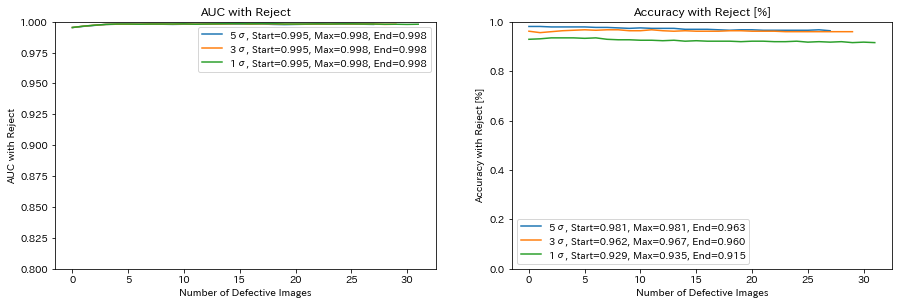



cable


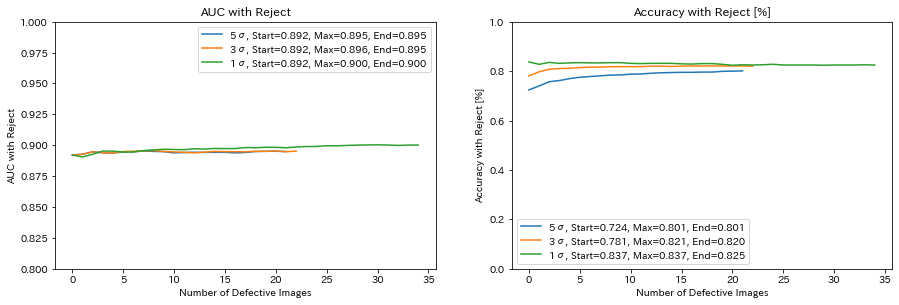



capsule


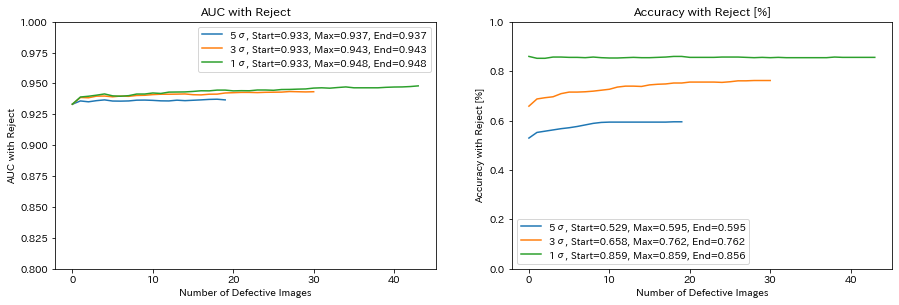



carpet


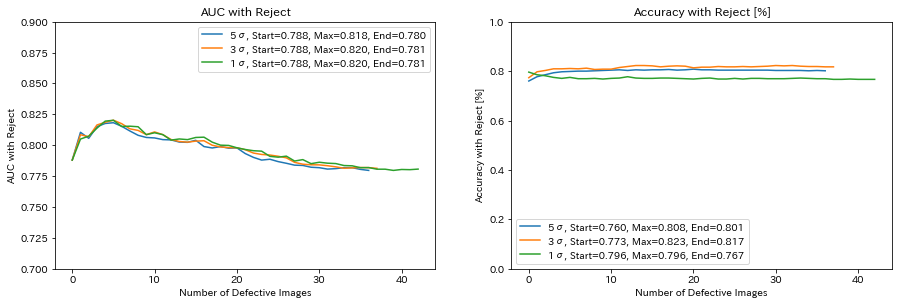



grid


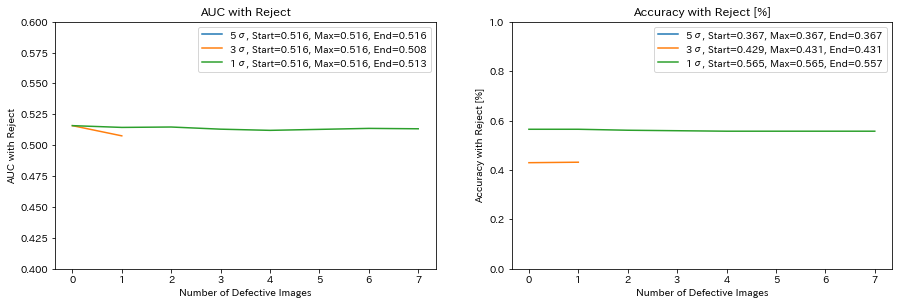



hazelnut


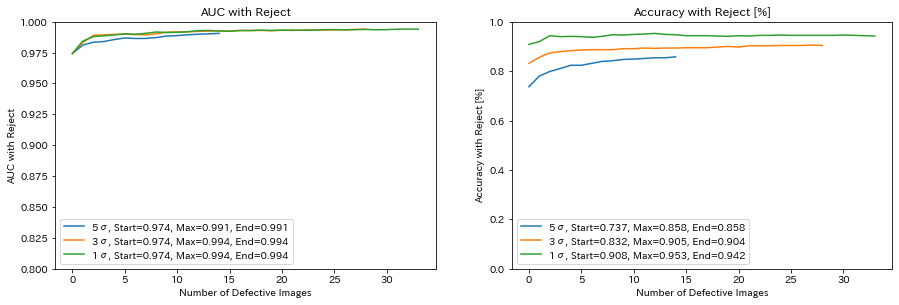



leather


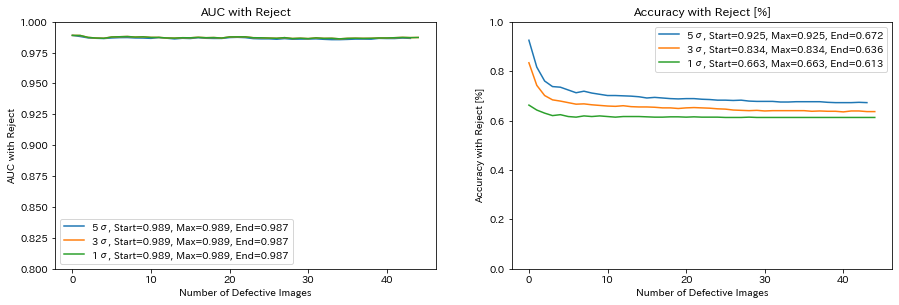



metal_nut


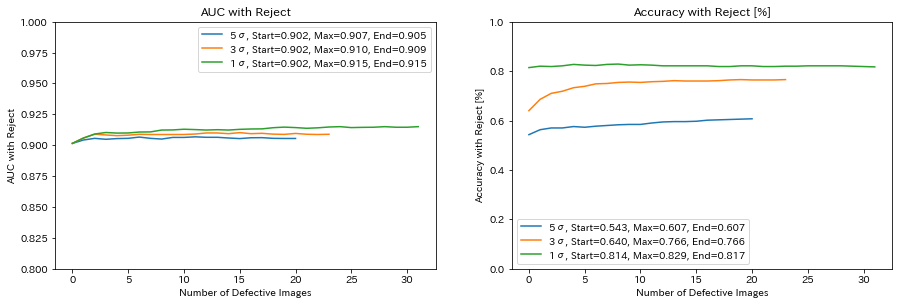



pill


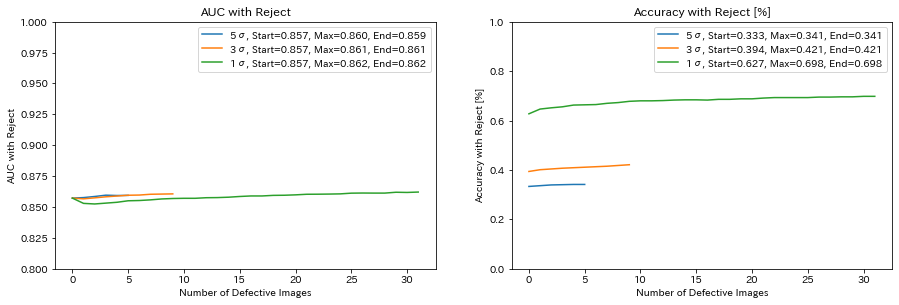



screw


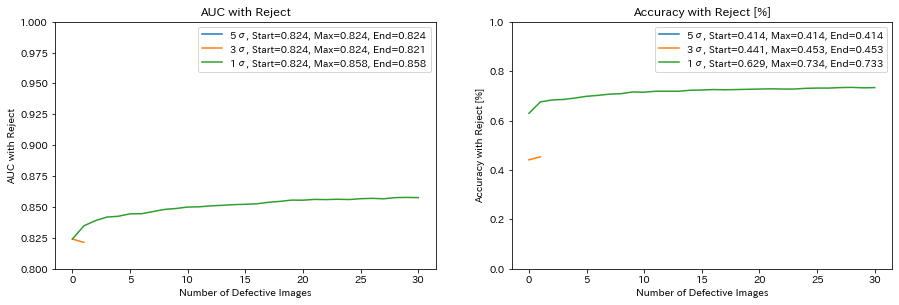



tile


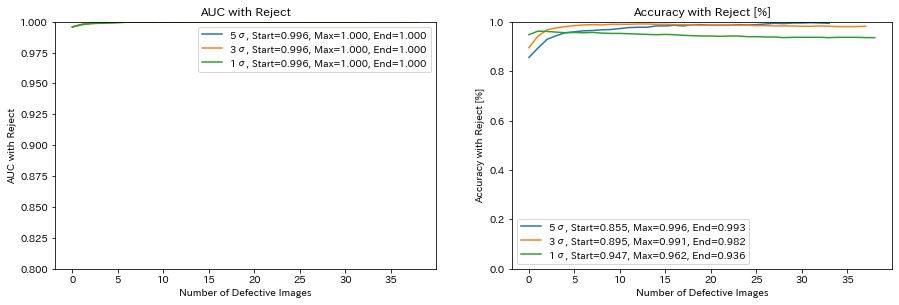



toothbrush


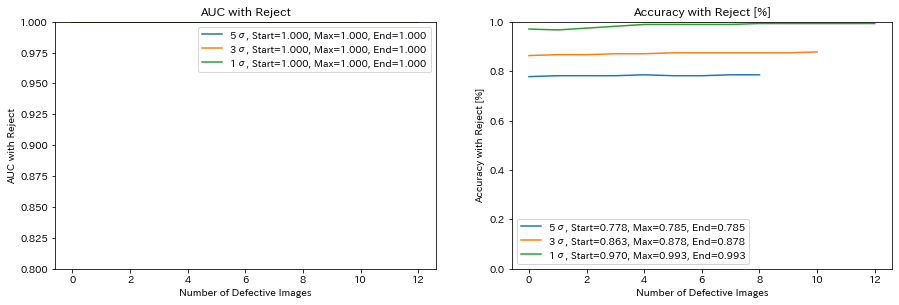



transistor


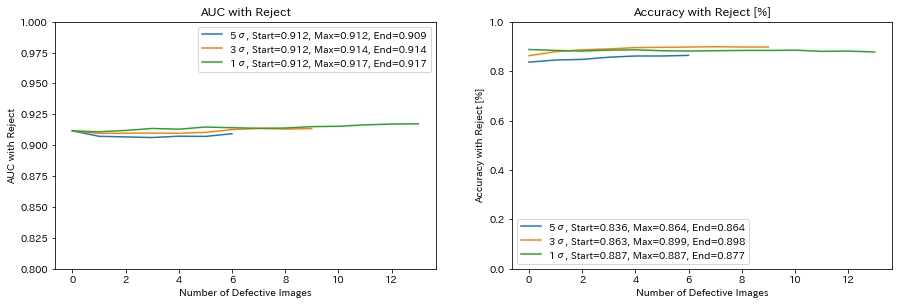



wood


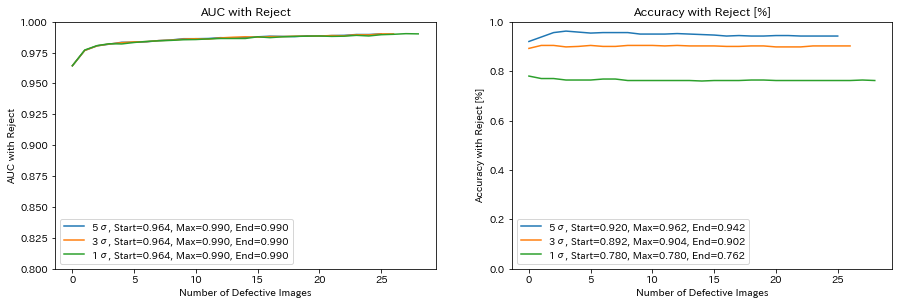



zipper


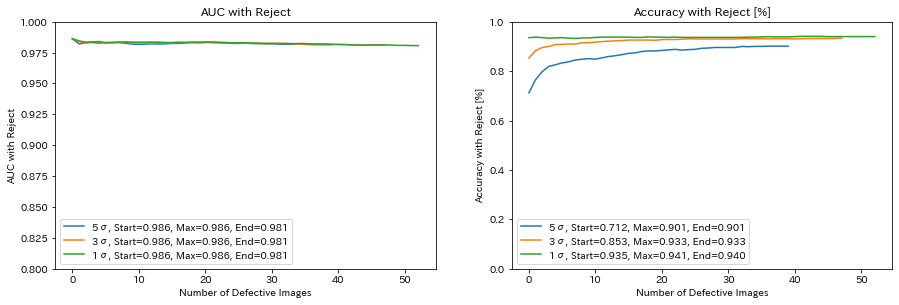

In [6]:
logdirs0 = sorted(glob.glob(dirname + '/*_mbn_*'))
classn = sorted(list(set([d.split('.')[0].split('/')[1] for d in logdirs0])))
# print(classn)
# interact(show_eachresult_reject, classn=classn, n_layer=n_layers, threshold=thresholds)
for c in classn:
    print('\n\n' + '='*100)
    print(c)
    #show_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=list(reversed([0])), ONE=False)
    show_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=list(reversed([1, 3, 5])), ONE=False)
    #show_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=list(reversed([3])), ONE=False)
    #show_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=list(reversed([1, 2, 3, 4, 5])), ONE=True)
    plt.show()

## 論文用票

In [7]:
# # dirname = 'output4all_reject_10_sigma_norm/'
# # dirname = 'output4all/'
# dirname = 'output4all_cgn/'
def table_eachresult_reject(classn, n_layer, threshold, mul_sigs, ONE=False, logtype="AUC"):
    for ms in mul_sigs:
        dirname1 = dirname + classn + '._mbn_*.{0}.*.{1}.{2}'.format(n_layer, threshold, ms)
        auclogs = glob.glob(os.path.join(dirname1, logtype+"log*.pcl"))
        auclog1 = []
        # print("len", len(auclogs))
        for aul in auclogs:
            auclog1.append(loadfile(aul))
            avg_auclog1 = []
            for itm in zip(*auclog1): # 時系列ごとに平均 / zipが最小の長さに合わせる
                avg_auclog1.append(np.mean(itm))
        if ONE:
            avg_auclog1 = auclog1[0]
    # print("{:.2f}".format(avg_auclog1[0]), end=', ') # 正常データのみ
    # print("len", len(avg_auclog1), end=': ')
    # 0番目
    print("{:.3f}".format(avg_auclog1[0]), end=', ')
    # 1番目
    print("{:.3f}".format(avg_auclog1[1]), end=', ')
    # 6以降５飛び
    for i in range(1, (len(avg_auclog1)//5)):
        # print((i*5)+1, end=', ')
        print("{:.3f}".format(avg_auclog1[(i*5)]), end=', ')
        # print(i*5, end=', ')
    print('')

## AUC
5飛び

In [8]:
logdirs0 = sorted(glob.glob(dirname + '/*_mbn_*'))
classn = sorted(list(set([d.split('.')[0].split('/')[1] for d in logdirs0])))
for c in classn:
    print("{:<15}".format(c), end=', ')
    table_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=[3], ONE=False)
    # table_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=list(reversed([1, 2, 3, 4, 5])), ONE=False)

bottle         , 0.995, 0.996, 0.998, 0.998, 0.998, 0.998, 0.998, 
cable          , 0.892, 0.893, 0.895, 0.895, 0.895, 
capsule        , 0.933, 0.939, 0.939, 0.941, 0.941, 0.943, 0.943, 
carpet         , 0.788, 0.809, 0.820, 0.811, 0.803, 0.798, 0.791, 0.784, 
grid           , 0.516, 0.508, 
hazelnut       , 0.974, 0.983, 0.990, 0.992, 0.992, 0.993, 
leather        , 0.989, 0.989, 0.988, 0.987, 0.987, 0.988, 0.987, 0.986, 0.987, 0.987, 
metal_nut      , 0.902, 0.906, 0.908, 0.909, 0.910, 
pill           , 0.857, 0.857, 0.860, 
screw          , 0.824, 0.821, 
tile           , 0.996, 0.998, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000, 
toothbrush     , 1.000, 1.000, 1.000, 
transistor     , 0.912, 0.910, 0.910, 
wood           , 0.964, 0.977, 0.984, 0.986, 0.987, 0.988, 
zipper         , 0.986, 0.984, 0.983, 0.983, 0.983, 0.983, 0.983, 0.982, 0.982, 0.982, 


## Accuracy
5飛び

In [9]:
logdirs0 = sorted(glob.glob(dirname + '/*_mbn_*'))
classn = sorted(list(set([d.split('.')[0].split('/')[1] for d in logdirs0])))
for c in classn:
    print("{:<15}".format(c), end=', ')
    table_eachresult_reject(classn=c, n_layer=19, threshold=0.999, mul_sigs=[3], ONE=False, logtype="ACC")

bottle         , 0.962, 0.956, 0.967, 0.963, 0.962, 0.962, 0.960, 
cable          , 0.781, 0.797, 0.814, 0.818, 0.820, 
capsule        , 0.658, 0.687, 0.715, 0.727, 0.744, 0.756, 0.757, 
carpet         , 0.773, 0.797, 0.811, 0.808, 0.821, 0.813, 0.817, 0.823, 
grid           , 0.429, 0.431, 
hazelnut       , 0.832, 0.857, 0.886, 0.891, 0.895, 0.897, 
leather        , 0.834, 0.742, 0.672, 0.659, 0.655, 0.651, 0.646, 0.639, 0.640, 0.635, 
metal_nut      , 0.640, 0.686, 0.739, 0.754, 0.760, 
pill           , 0.394, 0.401, 0.411, 
screw          , 0.441, 0.453, 
tile           , 0.895, 0.942, 0.984, 0.989, 0.989, 0.987, 0.984, 0.982, 
toothbrush     , 0.863, 0.867, 0.874, 
transistor     , 0.863, 0.879, 0.896, 
wood           , 0.892, 0.904, 0.904, 0.904, 0.902, 0.898, 
zipper         , 0.853, 0.883, 0.909, 0.917, 0.926, 0.928, 0.930, 0.930, 0.931, 0.930, 
